# III Training logistic regression model



 Let take a look how train logistic regression model. Computing the gradients of the loss function with respect to the weight and bias parameters in the model. So then we can use gradient descent to update the model. And then later on we will implement this in practice code. 
 
 ## Logistic sigmoid derivative
 
Generally another nice property of the logistic sigmoid (in mult-layer nets) is that it has nice derivatives
 
<code>**Sigmoid activation function**</code>

\begin{multline*}
\sigma(z) = \dfrac{1}{1 + e^{-z}}
\end{multline*}


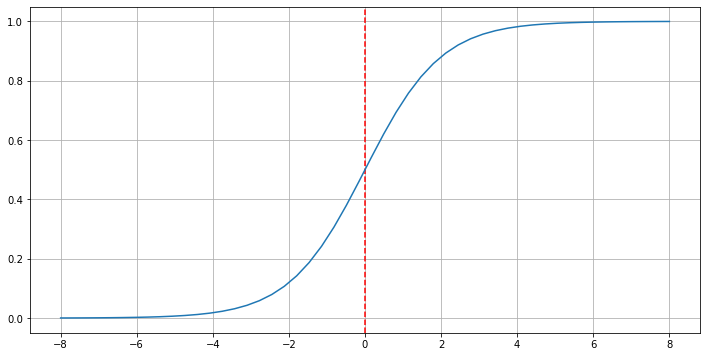

In [1]:
%run ../code_examples/visualize/sigmoid_function.py

<code>**Derivative of sigmoid activation function with respect to its input**</code>

\begin{multline*}
\dfrac{d}{dz}\sigma(z) = \dfrac{e^{-z}}{(1 + e^{-z})^2} = \sigma(z)(1 - \sigma(z))
\end{multline*}

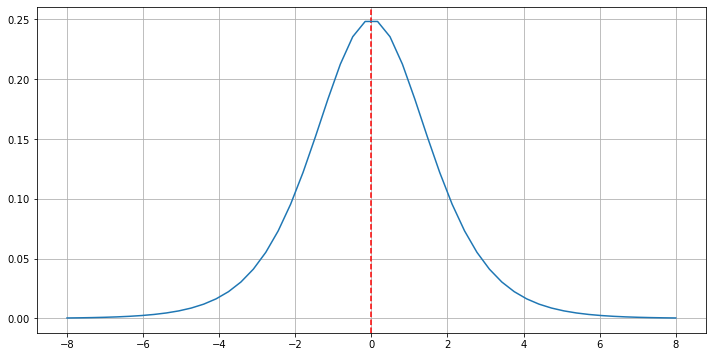

In [2]:
%run ../code_examples/visualize/simgoid_derivative.py

## Loss for a single training example

<code>**negative log likelihood**</code>
As we talked previously you can think that there are two parts of this loos function. The part when class label is 1 and the other part whene class label 0. And below we depict with true labels in data set, the label of training example. We only compute the loss function during training not prediction. It is used just to find the weight parameters of the model. So we are given these true labels.

\begin{multline*}
\mathcal{L}(\mathbf{w}) = - y^{(i)}log(\sigma(z^{(i)})) + (1 - y^{(i)})log(1 - \sigma(z^{(i)}))
\end{multline*}

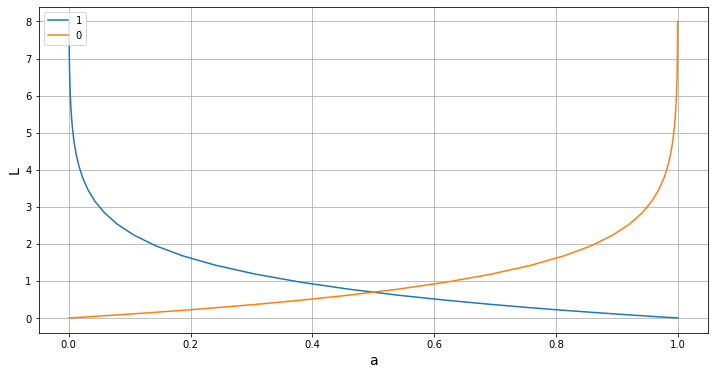

In [77]:
%run ../code_examples/visualize/logistic_regression_loos_function.py

So what happens if the true label is 1 , lets consider these scenarios by tinkering with loss function. By looking at the shape of these curves, we have activation on x axis that is our estimation probability, o y axis is the loss value. So considering both cases image what happens with the loss if the probability is of a give sample is calculated incorrectly ?

\begin{multline*}
P (y = 1 |\vec{x} ) = 1 - P (y = 0 |\vec{x} )  
\end{multline*}

## Learning rule

Same gradient descent rule as before for which we need is the same a we used to train linear model or adaline.<br>
We need the derivative of the loss function with respect to the weights. So that's the partial derivative of the loss function with respect to the weigh. And we also compute this partial derivative of the loss function with respect to the bias. It is the same concept. Ir order to do this we can compose it to three terms. The same as we done for adaline and linear regression. We compute the derivative of the loss with respect to the output of the activation function, then we compute the derivative of activation function with respect to the input. And then we compute the derivative of net input with respect to the weights. Here are all these terms written out. 

\begin{multline*}
\dfrac{\partial \mathcal{L}}{\partial w_{j}} = \dfrac{\partial \mathcal{L}}{\partial a} \dfrac{da}{dz} \dfrac{\partial z}{\partial w_{j}}
\end{multline*}

\begin{multline*}
\dfrac{\partial \mathcal{L}}{\partial a} = \dfrac{a - y}{a - a^2}
\end{multline*}

\begin{multline*}
\dfrac{da}{dz} = \dfrac{e^{-z}}{(1 + e^{-z})^2} = a \cdot (1 - a)
\end{multline*}

\begin{multline*}
\dfrac{\partial z}{w_{j}} = x_{j}
\end{multline*}

Now the only thing we have to do relly is to put those term together, just multiple them using chain rule. It quite similar as it was for adaline just looked simpler. To recap for adeline it was

\begin{multline*}
\dfrac{1}{n} (\hat{y} - y) \cdot x_{j}
\end{multline*}

For logistic regression it may look more complicated because we have these terms

\begin{multline*}
\dfrac{a - y}{a - a^2}
\end{multline*}

\begin{multline*}
a \cdot (1 - a)
\end{multline*}

But there is something nice thats happening, so we can actually simplify this. So this part when we put them together 

\begin{multline*}
\dfrac{a - y}{a - a^2}
\end{multline*}

\begin{multline*}
a \cdot (1 - a)
\end{multline*}

it simplifies like this and becomes very simple derivative by canceling each other thats why it is said that sigmoid function has nice derivatives. 

\begin{multline*}
\dfrac{\partial \mathcal{L}}{\partial a} \dfrac{da}{dz} = \dfrac{\partial \mathcal{L}}{\partial z} = a - y
\end{multline*}


\begin{multline*}
\dfrac{\partial \mathcal{L}}{\partial w_{j}}  = (a - y) x_{j}
\end{multline*}

It looks quite similar like adaline learning rule and linear regression.  Here from previous lectures where we had on adaline and linear regression so this was a stochastic gradient descent learning rule where we had initial weigts followed by training loop for the training epoch and then for loop over training examples that could also be for mini batches. And we compute the prediction, the gradients and then we do the update. And then we add the learning rate 𝜂. We can use exactly the same rule for logistic regression with one single note. And <code>**single difference is that (𝑎 ⇔ 𝑦̂) is computed differently ! It is now computed by nonlinear function**</code>

<code>**NOTE**</code>

\begin{multline*}
a - y \Leftrightarrow (y^{[i]} - \hat{y}^{[i]})
\end{multline*}

<code>**Stochastic gradient descent**</code>
<br>

1. Intialize parameters
\begin{multline*}
\mathbf{w} := 0 \in \mathbb{R}^{m}, \mathbf{b}:=0
\end{multline*}

2. For every training epoch:
    - For every ⟨𝑥[i],𝑦[i]⟩ ∈ 𝐃 :
        - a) <code>**compute prediction:**</code>
        
        \begin{multline*} \hat{y}^{[i]} := \sigma(\mathbf{x^{[i]}}^{\top} \mathbf{w} + b)\end{multline*}
        
        - b) <code>**calculate error:**</code> 
        
        \begin{multline*} \nabla_{\mathbf{w}} \ \mathbf{L} = (y^{[i]} - \hat{y}^{[i]})\mathbf{x}^{[i]}\end{multline*}
        \begin{multline*} \nabla_{\mathbf{b}} \ \mathbf{L} = (y^{[i]} - \hat{y}^{[i]})\end{multline*}
           
        - c) <code>**update parameters:**</code> 
        
        \begin{multline*} \mathbf{w}:=  \mathbf{w} + \eta \times (-\nabla_{\mathbf{w}}\mathbf{L}) \end{multline*}
         \begin{multline*} \mathbf{b}:= \mathbf{b} + \eta \times (-\nabla_{\mathbf{b}}\mathbf{L}) \end{multline*}

## Class label prediction with logistic regression

So few last things about this, here we can think of this as our whole computation graph. We haven't talked about this output yet. So we do the training and compute the error, we have a true label 𝑦 and from model comes out 𝑎 probabilites. From that one we compute the negative log likelihood, compute the gradients (the partial derivate of the loss with respect to the each weight and bias). And update our weights and biases. And for predictions we can use threshold function similar to adaline

 - 𝑦̂ is class label
 - 𝑎 is class membership probability 

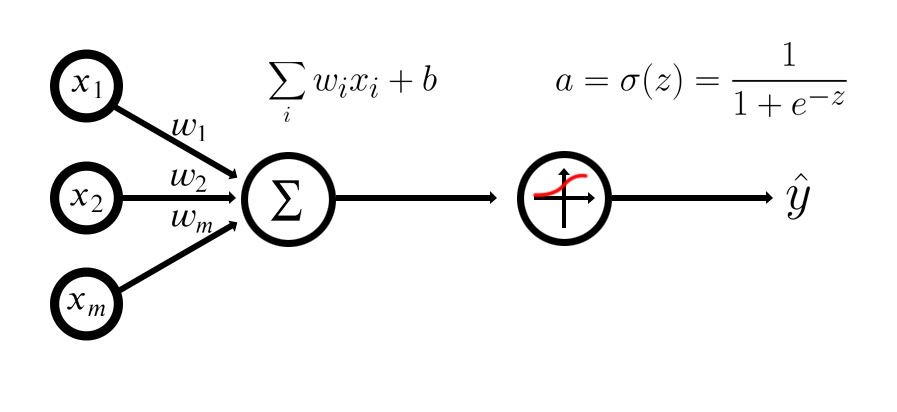

<code>**Threshold function**</code>

\begin{multline*}
\hat{y} := 
\left\{\begin{matrix}
1 & \sigma(z) > 0.5 \\
0 & \sigma(z) < 0.5 \
\end{matrix}\right.
\end{multline*}

<code>**Which is the same as below because we on prediction we can skip threshold function**</code>

\begin{multline*}
\hat{y} := 
\left\{\begin{matrix}
1 & z > 0.0 \\
0 & z < \ 0.0 \
\end{matrix}\right.
\end{multline*}

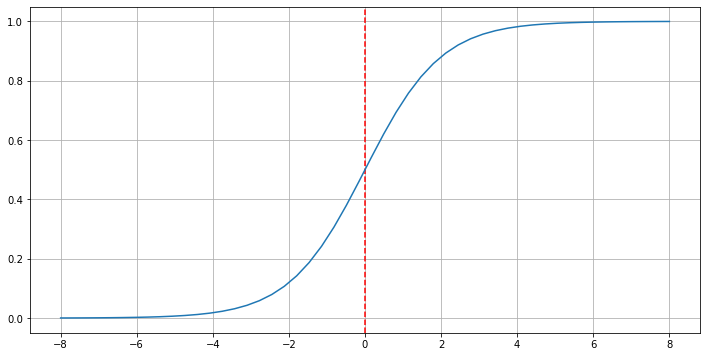

 - We can think of this part as a "separate" part that converts the neural network values into a class label, for example e.g ,via a threshold function
 - Predicted class labels are not used during training (except by the perceptron)
 - Adaline, Logistic regression, and all common types of multi-layer neural networks don't use predicted class labels for optimization as a threshold function is not smooth  
 